---
## Project 2: Sales Performance Analysis

In [10]:
import pandas as pd

# Load the CSV file
sales_df = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')

# Display the column names to check what's available
print("Available columns:", sales_df.columns.tolist())

# Example: Try to find a column that contains 'date'
for col in sales_df.columns:
    if 'date' in col.lower():
        sales_df[col] = pd.to_datetime(sales_df[col])
        print(f"Converted '{col}' to datetime format.")
        break
else:
    print("No column with 'date' in the name found.")

# Drop duplicates
sales_df.drop_duplicates(inplace=True)

# Fill missing values in numeric columns
sales_df.fillna(sales_df.mean(numeric_only=True), inplace=True)

# Show the cleaned DataFrame
print(sales_df.head())


Available columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Converted 'ORDERDATE' to datetime format.
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 

### Sales Trend Over Time

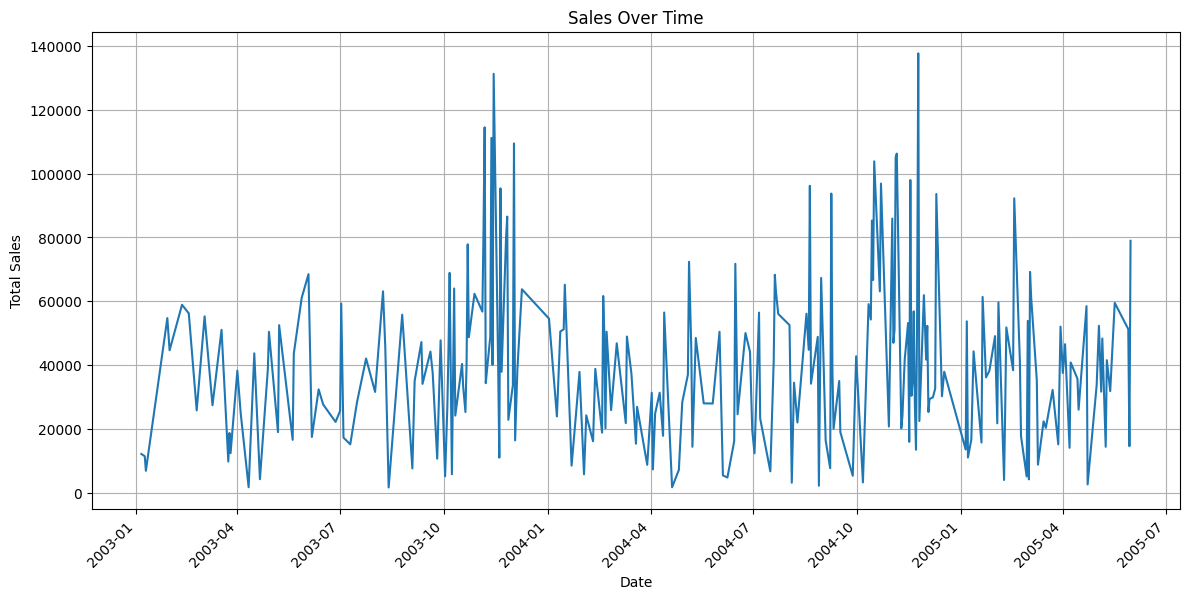

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
sales_df = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')

# Convert ORDERDATE to datetime format
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'], errors='coerce')

# Drop rows where ORDERDATE couldn't be parsed
sales_df.dropna(subset=['ORDERDATE'], inplace=True)

# Group by date and sum sales
daily_sales = sales_df.groupby('ORDERDATE')['SALES'].sum()

# Plotting
plt.figure(figsize=(12, 6))
daily_sales.plot()

plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Profit vs Discount Scatter Plot

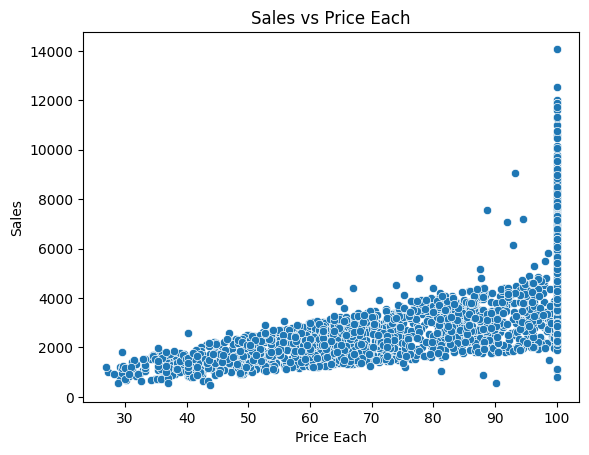

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of PRICEEACH vs SALES
sns.scatterplot(data=sales_df, x='PRICEEACH', y='SALES')
plt.title('Sales vs Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()


### Sales by Region and Category

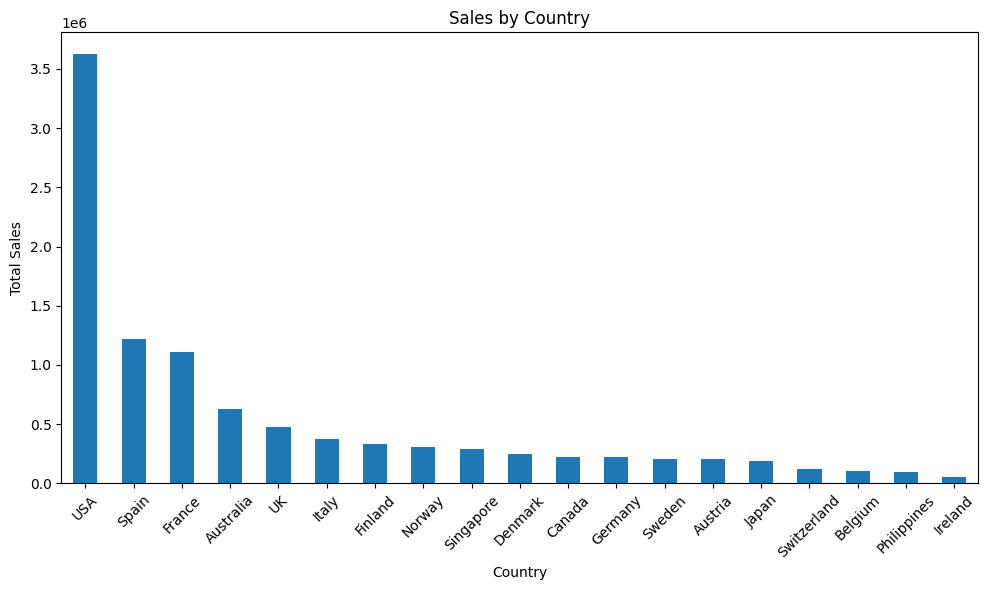

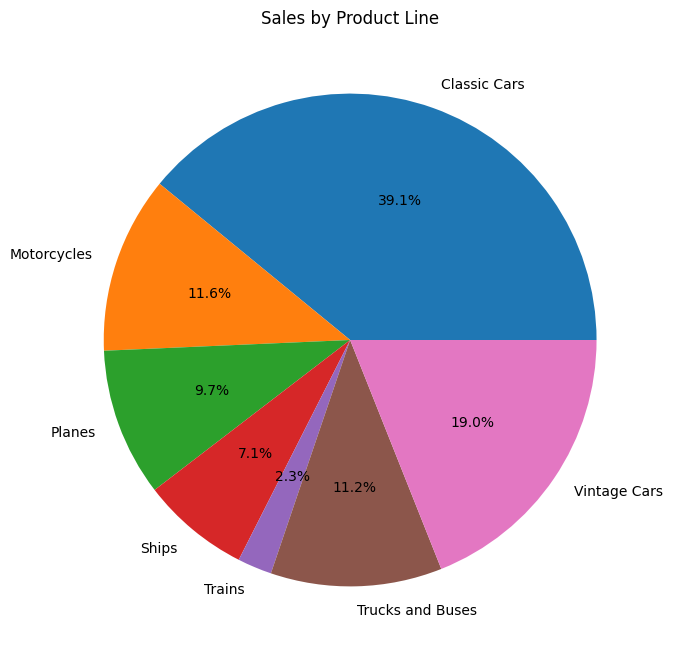

In [23]:
import matplotlib.pyplot as plt

# Sales by Country (as Region)
sales_df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by Product Line (as Category)
sales_df.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Sales by Product Line')
plt.ylabel('')
plt.show()


### Predictive Modeling

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select available numeric features
X = sales_df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'ORDERLINENUMBER']]
y = sales_df['SALES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print('R^2 Score:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))


R^2 Score: 0.7626854640261581
MSE: 1035851.882831265
